In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import numpy as np

In [6]:
df = pd.read_csv('./cleaned_data.csv')

In [7]:
# df = df.iloc[:50000]

In [8]:
print(df.iloc[20,1])

local food like dhikri and bagiya offers a taste of the tharu communitys unique cuisine


In [13]:
def dataset_overview(df):
    print("Dataset Overview:")
    print(f"Total samples: {len(df)}")
    print(f"Missing Nepali sentences: {df['Nepali'].isnull().sum()}")
    print(f"Missing English sentences: {df['English'].isnull().sum()}")
    print()

    nepali_lengths = df['Nepali'].dropna().apply(lambda x: len(x.split()))
    english_lengths = df['English'].dropna().apply(lambda x: len(x.split()))

    print(f"Average Nepali sentence length: {np.mean(nepali_lengths):.2f}")
    print(f"Average English sentence length: {np.mean(english_lengths):.2f}")
    print(f"Max Nepali sentence length: {np.max(nepali_lengths)}")
    print(f"Max English sentence length: {np.max(english_lengths)}")
    print()

    return nepali_lengths, english_lengths

# Token statistics
def token_statistics(df, column, language):
    sentences = df[column].dropna()
    tokens = [word for sentence in sentences for word in sentence.split()]
    token_counts = Counter(tokens)
    print(f"{language} Vocabulary Size: {len(token_counts)}")
    print(f"Most common {language} tokens:")
    for token, count in token_counts.most_common(10):
        print(f"{token}: {count}")
    print()
    return token_counts

# Generate visualizations
def generate_visualizations(nepali_lengths, english_lengths, nepali_tokens, english_tokens):
    # Sentence length distribution
    plt.figure(figsize=(6, 4))
    plt.hist(nepali_lengths, bins=30, alpha=0.7, label='Nepali Sentence Lengths')
    plt.hist(english_lengths, bins=30, alpha=0.7, label='English Sentence Lengths')
    plt.title("Sentence Length Distribution")
    plt.xlabel("Number of Words")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

    # Word clouds
    nepali_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(nepali_tokens)
    english_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(english_tokens)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(nepali_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Nepali Word Cloud")

    plt.subplot(1, 2, 2)
    plt.imshow(english_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("English Word Cloud")
    plt.show()

# Identify pairs with high length disparity
def length_disparity_analysis(df):
    df['nepali_length'] = df['Nepali'].dropna().apply(lambda x: len(x.split()))
    df['english_length'] = df['English'].dropna().apply(lambda x: len(x.split()))
    df['length_difference'] = abs(df['nepali_length'] - df['english_length'])
    large_disparity = df[df['length_difference'] > 10]  # Threshold can be adjusted
    print(f"Sentence pairs with large length disparity: {len(large_disparity)}")
    print(large_disparity[['Nepali', 'English', 'length_difference']].head())
    print()



In [14]:
# Main
nepali_lengths, english_lengths = dataset_overview(df)


Dataset Overview:
Total samples: 2828
Missing Nepali sentences: 0
Missing English sentences: 0

Average Nepali sentence length: 10.79
Average English sentence length: 13.16
Max Nepali sentence length: 35
Max English sentence length: 38



In [16]:
nepali_tokens = token_statistics(df, 'Nepali', 'Nepali')
english_tokens = token_statistics(df, 'English', 'English')

Nepali Vocabulary Size: 6131
Most common Nepali tokens:
र: 1077
छ: 686
हो: 490
यो: 401
तर: 300
छन्: 299
नेपाल: 275
यहाँको: 236
लाग्छ: 229
देख्दा: 224

English Vocabulary Size: 3687
Most common English tokens:
the: 2934
of: 1506
and: 1114
is: 870
a: 834
to: 775
in: 717
nepal: 459
its: 413
here: 411



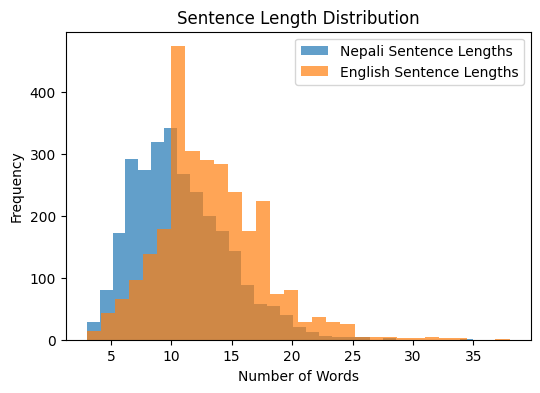

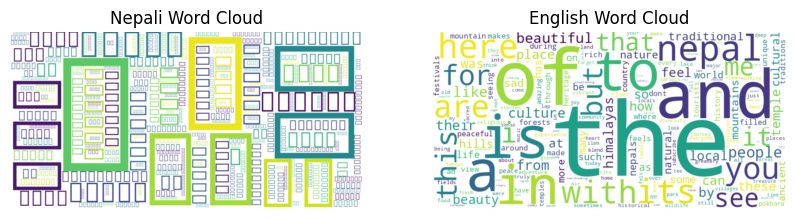

In [17]:
generate_visualizations(nepali_lengths, english_lengths, nepali_tokens, english_tokens)

In [18]:
length_disparity_analysis(df)

Sentence pairs with large length disparity: 8
                                                 Nepali  \
1207  इलामका लालीगुराँसका जंगलहरू वसन्तमा रातो र गुल...   
1496  हामी पाटनको प्रसिद्ध कृष्ण मन्दिरमा छौं यो ठाउ...   
1552  मन्दिरको छेउमा बग्ने बागमती नदीमा परिवारहरूले ...   
1834  अब हामी हात्ती सफारीतर्फ जाँदैछौं यो अनुभवले त...   
2499  नेपाल हिमालको शान जंगलको माया तराईको रङ्ग र मा...   

                                                English  length_difference  
1207  the rhododendron forests of ilam burst into a ...                 12  
1496  here we are at the famous krishna mandir in pa...                 11  
1552  the bagmati river flowing next to the temple i...                 13  
1834  now we are heading towards the elephant safari...                 11  
2499  nepal is the pride of the himalayas the love o...                 11  



In [19]:
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer

In [20]:


# Character-level analysis
def character_analysis(df):
    print("Character-Level Analysis:")
    nepali_char_counts = df['ne'].dropna().apply(len)
    english_char_counts = df['en'].dropna().apply(len)

    print(f"Average Nepali sentence character count: {nepali_char_counts.mean():.2f}")
    print(f"Average English sentence character count: {english_char_counts.mean():.2f}")
    print()

    # Frequency of unique characters
    nepali_chars = ''.join(df['ne'].dropna())
    english_chars = ''.join(df['en'].dropna())
    
    nepali_char_freq = Counter(nepali_chars)
    english_char_freq = Counter(english_chars)

    print("Most Common Characters in Nepali:")
    print(nepali_char_freq.most_common(10))
    print("\nMost Common Characters in English:")
    print(english_char_freq.most_common(10))
    print()

# N-gram analysis
def ngram_analysis(df, column, language, n=2):
    sentences = df[column].dropna()
    vectorizer = CountVectorizer(ngram_range=(n, n), token_pattern=r'\b\w+\b')
    ngrams = vectorizer.fit_transform(sentences)
    ngram_counts = zip(vectorizer.get_feature_names_out(), ngrams.sum(axis=0).tolist()[0])
    sorted_ngrams = sorted(ngram_counts, key=lambda x: x[1], reverse=True)

    print(f"Most Common {n}-grams in {language}:")
    for ngram, count in sorted_ngrams[:10]:
        print(f"{ngram}: {count}")
    print()

# Correlation analysis
def length_correlation(df, nepali_lengths, english_lengths):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=nepali_lengths, y=english_lengths, alpha=0.5)
    plt.title("Correlation of Sentence Lengths (Nepali vs English)")
    plt.xlabel("Nepali Sentence Length (words)")
    plt.ylabel("English Sentence Length (words)")
    plt.show()

    correlation = np.corrcoef(nepali_lengths, english_lengths)[0, 1]
    print(f"Correlation coefficient between Nepali and English sentence lengths: {correlation:.2f}")
    print()

# Detect duplicate pairs
def detect_duplicates(df):
    duplicate_pairs = df[df.duplicated(['ne', 'en'], keep=False)]
    print(f"Number of duplicate sentence pairs: {len(duplicate_pairs)}")
    print(duplicate_pairs.head())
    print()

# Translation directionality analysis
def translation_directionality(df):
    df['nepali_length'] = df['ne'].dropna().apply(lambda x: len(x.split()))
    df['english_length'] = df['en'].dropna().apply(lambda x: len(x.split()))
    nepali_longer = len(df[df['nepali_length'] > df['english_length']])
    english_longer = len(df[df['english_length'] > df['nepali_length']])

    print(f"Sentence pairs where Nepali is longer: {nepali_longer}")
    print(f"Sentence pairs where English is longer: {english_longer}")
    print(f"Ratio (Nepali longer : English longer): {nepali_longer / english_longer:.2f}")
    print()

# Heatmap of bigram frequencies
def bigram_heatmap(df, column, language):
    sentences = df[column].dropna()
    vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'\b\w+\b')
    bigrams = vectorizer.fit_transform(sentences).toarray()
    bigram_names = vectorizer.get_feature_names_out()
    bigram_counts = bigrams.sum(axis=0)

    # Convert to a DataFrame for visualization
    bigram_df = pd.DataFrame({'bigram': bigram_names, 'count': bigram_counts})
    bigram_df = bigram_df.sort_values(by='count', ascending=False).head(20)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(data=bigram_df, x='count', y='bigram')
    plt.title(f"Top 20 Bigram Frequencies in {language}")
    plt.xlabel("Frequency")
    plt.ylabel(f"{language} Bigrams")
    plt.show()




In [21]:
# Main for additional insights
character_analysis(df)

Character-Level Analysis:


KeyError: 'ne'

In [ ]:
ngram_analysis(df, 'ne', 'Nepali', n=5)

Most Common 5-grams in Nepali:
म न सहर ल ई: 2439
त न हर ल ई: 2391
त म हर ल ई: 1754
ह न ह न छ: 1242
सञ च लन गर न: 916
ल त न हर ल: 823
स व स थ य: 805
न र म ण गर: 782
गर न ह न छ: 706
भन न ह न छ: 674



In [ ]:
ngram_analysis(df, 'en', 'English', n=5)

Most Common 5-grams in English:
of the children of israel: 155
during the seventh plan period: 152
by the end of the: 131
thus says the lord yahweh: 129
yahweh the god of israel: 118
out of the land of: 100
the word of yahweh came: 100
of the land of egypt: 89
in the midst of the: 88
word of yahweh came to: 87



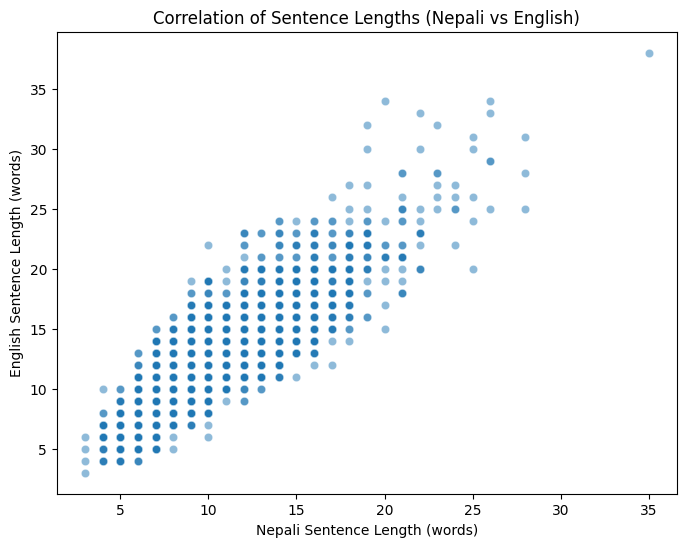

Correlation coefficient between Nepali and English sentence lengths: 0.84



In [22]:
length_correlation(df, nepali_lengths, english_lengths)

In [24]:
# detect_duplicates(df)

In [26]:
# translation_directionality(df)

In [27]:
# bigram_heatmap(df, 'ne', 'Nepali')

In [ ]:
# bigram_heatmap(df, 'en', 'English')